In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Dataset/AB_NYC_2019.csv')
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [28]:
df1 = df.drop(df[df.name.isnull() | df.host_name.isnull()].index)

In [87]:
min_th, max_th = df1['price'].quantile([0.01,0.999])
min_th, max_th

(30.0, 3000.0)

In [64]:
df1[df1.price > 69.0].shape

(36498, 16)

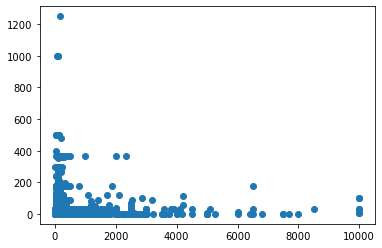

In [38]:
plt.scatter(df1.price, df1.minimum_nights)

In [89]:
df2 = df1[(df1.price > min_th) & (df1.price < max_th)]
df2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.814700e+04,4.814700e+04,48147.00000,48147.000000,48147.000000,48147.000000,48147.000000,38291.000000,48147.000000,48147.000000
mean,1.896874e+07,6.724132e+07,40.72915,-73.952499,148.786404,6.993188,23.392153,1.373722,7.194405,112.758240
std,1.099387e+07,7.852780e+07,0.05423,0.045897,153.633511,20.028712,44.700196,1.680764,33.187865,131.511305
min,2.539000e+03,2.438000e+03,40.49979,-74.244420,31.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.414277e+06,7.718759e+06,40.69034,-73.983190,70.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.960681e+07,3.038409e+07,40.72328,-73.955940,110.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.911569e+07,1.072729e+08,40.76318,-73.936975,179.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.91306,-73.712990,2999.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


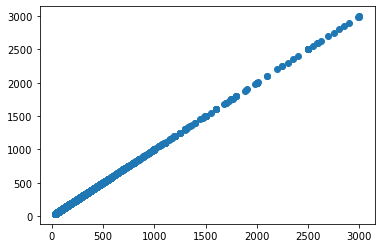

In [90]:
plt.scatter(df2.price,df2.price)

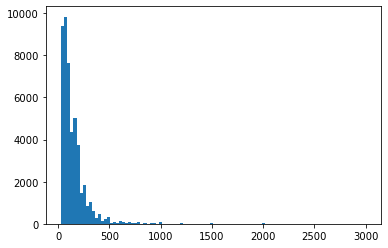

In [101]:
plt.hist(df2.price, bins=100)
plt.show()

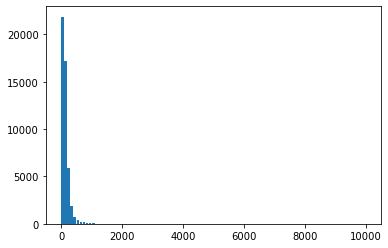

In [97]:
plt.hist(df1.price, bins=100, rwidth=0.9)
plt.show()